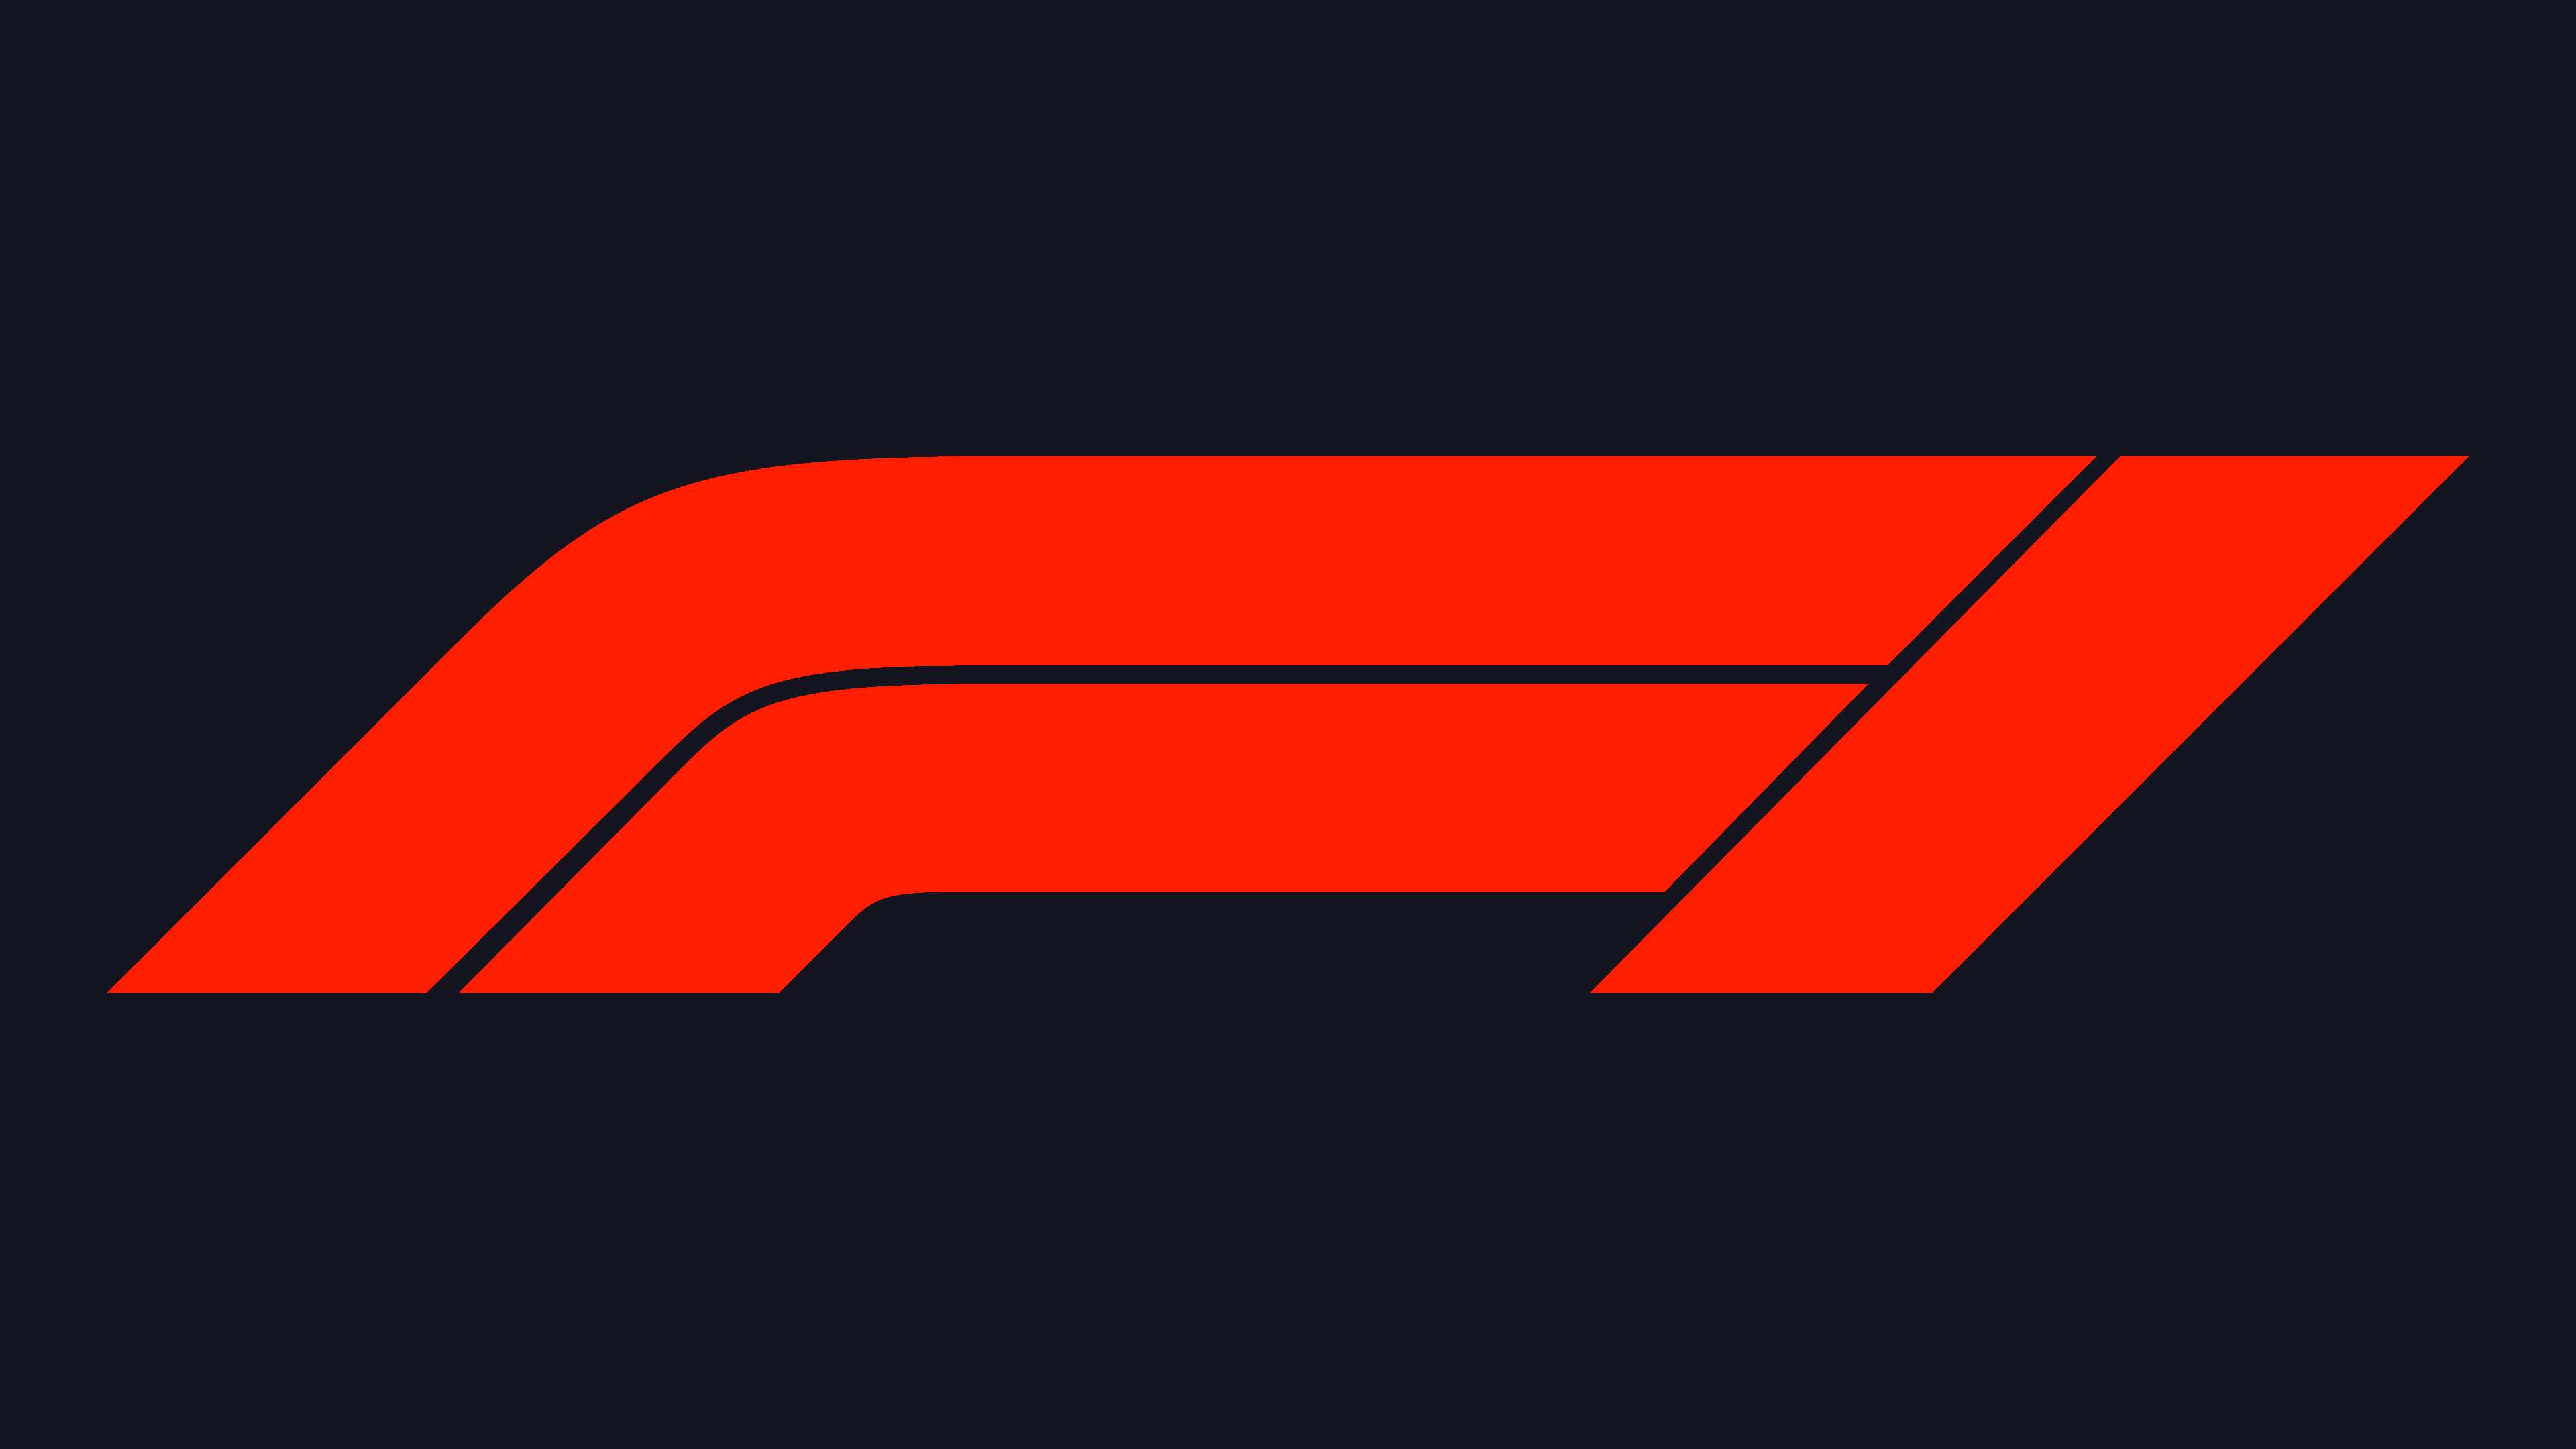
### **F1 Driver Statistics**

This notebook analyzes various statistics of Formula 1 drivers.

**Dataset:** [F1 Drivers Dataset (Kaggle)](https://www.kaggle.com/datasets/rishikeshkonapure/f1-drivers-dataset)

**Note:** Data is accurate up to the 2023 Bahrain Grand Prix, excluding drivers who only participated in Friday practice sessions.

In [595]:
import pandas as pd

In [596]:
df=pd.read_csv('/content/drive/MyDrive/datasets/F1DriversDataset.csv')
df.head(1)

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.0,0.0,0.0,0.0,0.0,2,False


In [597]:
all= df[['Nationality','Driver','Championships']]

In [598]:

all=all.query('Championships>0')

In [599]:
all['total'] = all.groupby('Nationality')['Championships'].transform('sum')

In [600]:
all=all.sort_values(by=['total','Championships','Driver'],ascending=[False,False,True])

In [601]:
all.reset_index(drop=True, inplace=True)
all.drop(columns=['total'])

,Nationality,Driver,Championships
0,United Kingdom,Lewis Hamilton,7.0
1,United Kingdom,Jackie Stewart,3.0
2,United Kingdom,Graham Hill,2.0
3,United Kingdom,Jim Clark,2.0
4,United Kingdom,Damon Hill,1.0
5,United Kingdom,James Hunt,1.0
6,United Kingdom,Jenson Button,1.0
7,United Kingdom,John Surtees,1.0
8,United Kingdom,Mike Hawthorn,1.0
9,United Kingdom,Nigel Mansell,1.0


In [602]:
driver_colors = {
    'Lewis Hamilton': '#1f77b4', # Blue
    'Jackie Stewart': '#ff7f0e', # Orange
    'Graham Hill': '#2ca02c', # Green
    'Jim Clark': '#d62728', # Red
    'Damon Hill': '#9467bd', # Purple
    'James Hunt': '#8c564b', # Brown
    'Jenson Button': '#e377c2', # Pink
    'John Surtees': '#7f7f7f', # Gray
    'Mike Hawthorn': '#bcbd22', # Olive
    'Nigel Mansell': '#17becf', # Cyan
    'Michael Schumacher': '#a55594', # Dark Purple
    'Sebastian Vettel': '#393b79', # Dark Blue
    'Nico Rosberg': '#637939', # Dark Green
    'Ayrton Senna': '#e6550d', # Dark Orange
    'Nelson Piquet': '#31a354', # Medium Green
    'Emerson Fittipaldi': '#756bb1', # Medium Purple
    'Juan Manuel Fangio': '#636363', # Dark Gray
    'Alain Prost': '#e41a1c', # Bright Red
    'Jack Brabham': '#377eb8', # Light Blue
    'Niki Lauda': '#4daf4a', # Bright Green
    'Mika Häkkinen': '#984ea3', # Magenta
    'Alan Jones': '#ff7f00', # Orange-Yellow
    'Jochen Rindt': '#ffff33', # Yellow
    'Keke Rosberg': '#a65628', # Dark Brown
    'Kimi Räikkönen': '#f781bf', # Light Pink
    'Alberto Ascari': '#999999', # Light Gray
    'Nino Farina': '#66c2a5', # Teal
    'Fernando Alonso': '#fc8d62', # Peach
    'Max Verstappen': '#8da0cb', # Periwinkle
    'Mario Andretti': '#e78ac3', # Lavender
    'Phil Hill': '#a6d854', # Light Olive
    'Denny Hulme': '#ffd92f', # Gold
    'Jacques Villeneuve': '#e5c494', # Tan
    'Jody Scheckter': '#b3b3b3' # Silver
}

In [609]:
fig = px.treemap(
    all,
    path=['Nationality', 'Driver'],
    values='Championships',
    color='Driver',
    color_discrete_map=driver_colors,
    title='🏎️ F1 Championships by Country and Driver',
    hover_data=['Nationality', 'Driver', 'Championships']
)

fig.update_layout(
    title='<b>🏎️ F1 Championships by Country and Driver</b>',
    title_font_size=40,
    title_x=0.5,
    margin=dict(t=80, l=25, r=25, b=25)
)

fig.update_traces(
    texttemplate="%{label}<br>%{value}",
    textfont_size=18,
    textfont_color="black",
    marker_line_color='white',
    marker_line_width=2
)

fig.show()


Text(0.5, 1.0, 'Correlation Matrix')

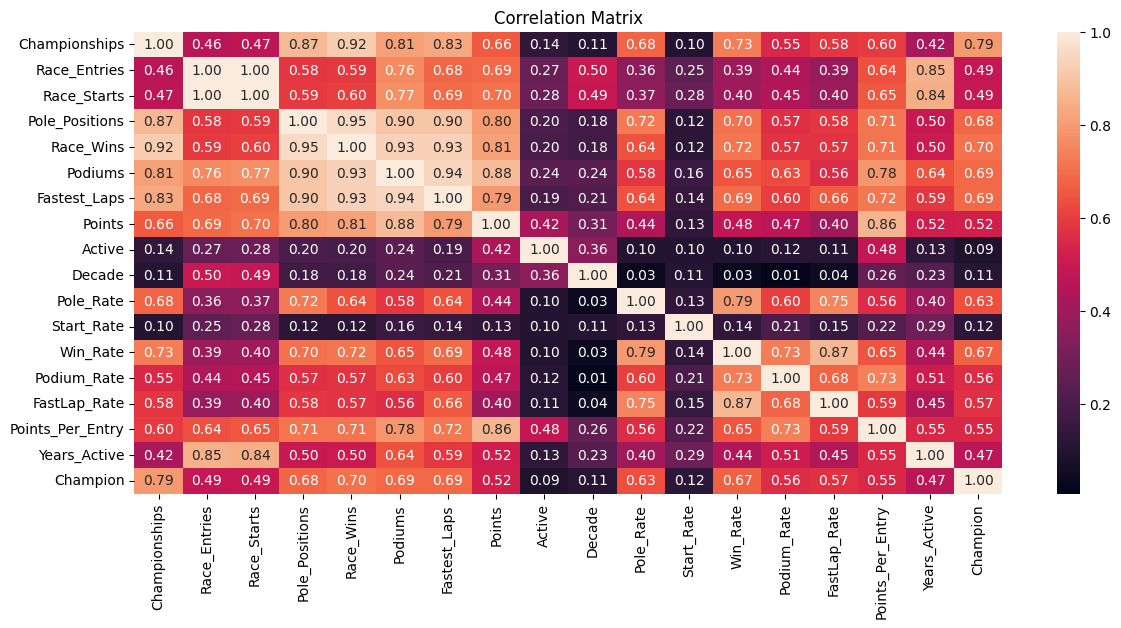

In [635]:
import seaborn as sns
import matplotlib.pyplot as plt
mtx=df.corr(numeric_only=True)
plt.figure(figsize=(14, 6)) # Set figure size to make the heatmap bigger
sns.heatmap(mtx,annot=True, fmt='.2f') # Set color range from -1 to 1 and format annotations to two decimal places
plt.title('Correlation Matrix')